<a href="https://colab.research.google.com/github/Aniket0325/Netflix_Project/blob/main/Netflix_Business_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aniket Chavan**

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## **Un-nesting the columns**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [66]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [67]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [68]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [69]:
df.shape

(8807, 12)

In [70]:
# Un-nest the columns those have cells with multiple comma separated values by creating multiple rows
def unnest_columns(df, columns):
    for col in columns:
        df[col] = df[col].str.split(',')
        df = df.explode(col)
    return df

In [71]:
 nested_columns = ['cast', 'director', 'country', 'listed_in']
 df = unnest_columns(df, nested_columns)
 df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202065 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director      151422 non-null  object
 4   cast          199916 non-null  object
 5   country       190168 non-null  object
 6   date_added    201907 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        201998 non-null  object
 9   duration      202062 non-null  object
 10  listed_in     202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


Observation - After unnesting the number of columns increased sgnificantly

# **# Handling null values**

a. For categorical variables with null values, update those rows as
unknown_column_name.

In [73]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,2149
country,11897
date_added,158
release_year,0
rating,67
duration,3


In [74]:
# Filling of all missing values by as desired
df.fillna({'director' : "Unknown Director"}, inplace=True)
df.fillna({'cast' : "Unknown Cast"}, inplace=True)
df.fillna({'country' : "Unknown country"}, inplace=True)
df.fillna({'rating' : "Unknown rating"}, inplace=True)
df.fillna({'duration' : "Unknown duration"}, inplace=True)
df.fillna({'date_added' : 0}, inplace=True)

In [75]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202065 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director      202065 non-null  object
 4   cast          202065 non-null  object
 5   country       202065 non-null  object
 6   date_added    202065 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        202065 non-null  object
 9   duration      202065 non-null  object
 10  listed_in     202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


# Observation - Here we can see that there is no null value present in data set now.

# **Q1 Find the counts of each categorical variable both using graphical and nongraphical analysis**.

# Q1.1 Nongraphical Analysis -

In [77]:
columns_to_count = ['director', 'cast', 'country', 'listed_in', 'release_year']
for column in columns_to_count:
    value_counts = df[column].value_counts()
    print(f"Value counts for {column}:  \n{value_counts}\n")

Value counts for director:  
director
Unknown Director       50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
 Reuben Atlas              1
Max Amini                  1
Bassam Tariq               1
Paul Miller                1
Kirsten Johnson            1
Name: count, Length: 5121, dtype: int64

Value counts for cast:  
cast
Unknown Cast             2149
 Alfred Molina            160
 Salma Hayek              130
 Frank Langella           128
 John Rhys-Davies         125
                         ... 
 Cle Sloan                  1
 George Konner              1
 Andy Hayward               1
 Lyric Lewis                1
 Trent 'Maxi' Maxwell       1
Name: count, Length: 39297, dtype: int64

Value counts for country:  
country
United States      49868
India              22139
Unknown country    11897
United Kingdom      9733
 United States      9482
                   ...  
 Samoa        

In [78]:
# Unique counts -
columns_to_count = ['cast', 'director', 'country', 'listed_in', 'release_year']
for column in columns_to_count:
    unique_counts = df[column].nunique()
    print(f"Unique counts for {column}:  \n{unique_counts}\n")

Unique counts for cast:  
39297

Unique counts for director:  
5121

Unique counts for country:  
198

Unique counts for listed_in:  
73

Unique counts for release_year:  
74



In [79]:
# We can modify it in table format also -
columns_to_count = ['cast', 'director', 'country', 'listed_in', 'release_year']
unique_counts = {col : df[col].nunique() for col in columns_to_count}
unique_counts_df = pd.DataFrame(list(unique_counts.items()), columns = ["columns","counts"])
unique_counts_df

,columns,counts
0,cast,39297
1,director,5121
2,country,198
3,listed_in,73
4,release_year,74


# 1.2 Graphical Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

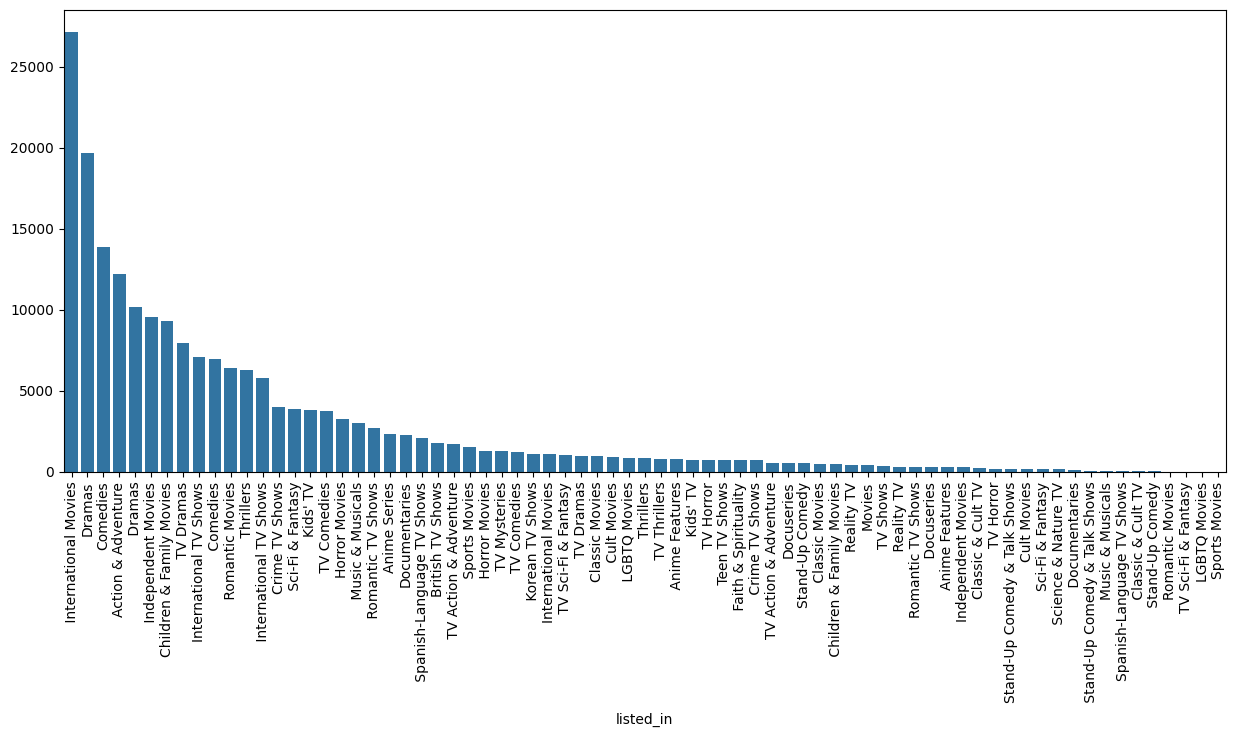

In [80]:
genre_counts = df['listed_in'].value_counts()
plt.figure(figsize = (15,6))
sns.barplot(x = genre_counts.index, y = genre_counts.values)
plt.xticks(rotation = 90)
plt.show

In [81]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

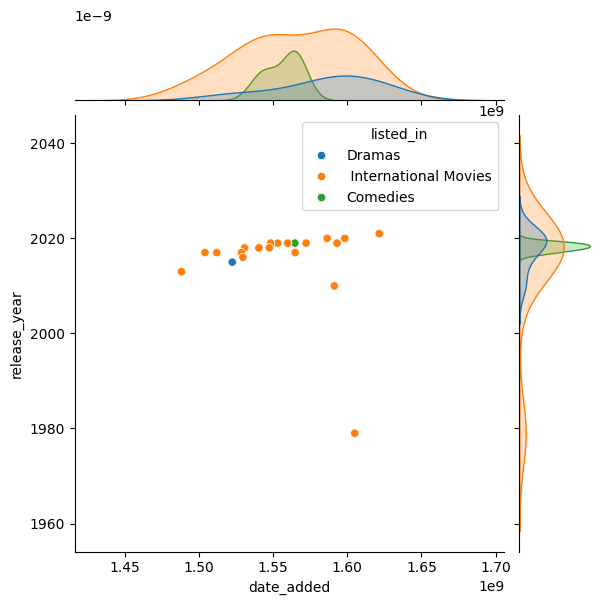

In [82]:
# arranging data for plot
top3_direct = df['director'].value_counts().index[:3]
top3_cast = df['cast'].value_counts().index[:3]
top3_genre = df['listed_in'].value_counts().index[:3]
top3_data = df.loc[(df["director"].isin(top3_direct)) & (df["cast"].isin(top3_cast)) & (df['listed_in'].isin(top3_genre))]

# Convert 'date_added' and 'release_year' to numeric if they are not already
top3_data['date_added'] = pd.to_datetime(top3_data['date_added'], errors='coerce').astype('int64') // 10**9  # Convert to Unix timestamp
top3_data['release_year'] = pd.to_numeric(top3_data['release_year'], errors='coerce')

# Now create the jointplot
sns.jointplot(x='date_added', y='release_year', data=top3_data, hue='listed_in')
plt.show()

In [83]:
# Filling of all missing values by as desired
df.fillna({'director' : "Unknown Director"}, inplace=True)
df.fillna({'cast' : "Unknown Cast"}, inplace=True)
df.fillna({'country' : "Unknown country"}, inplace=True)
df.fillna({'rating' : "Unknown rating"}, inplace=True)
df.fillna({'duration' : "Unknown duration"}, inplace=True)
df.fillna({'date_added' : pd.NaT}, inplace=True)

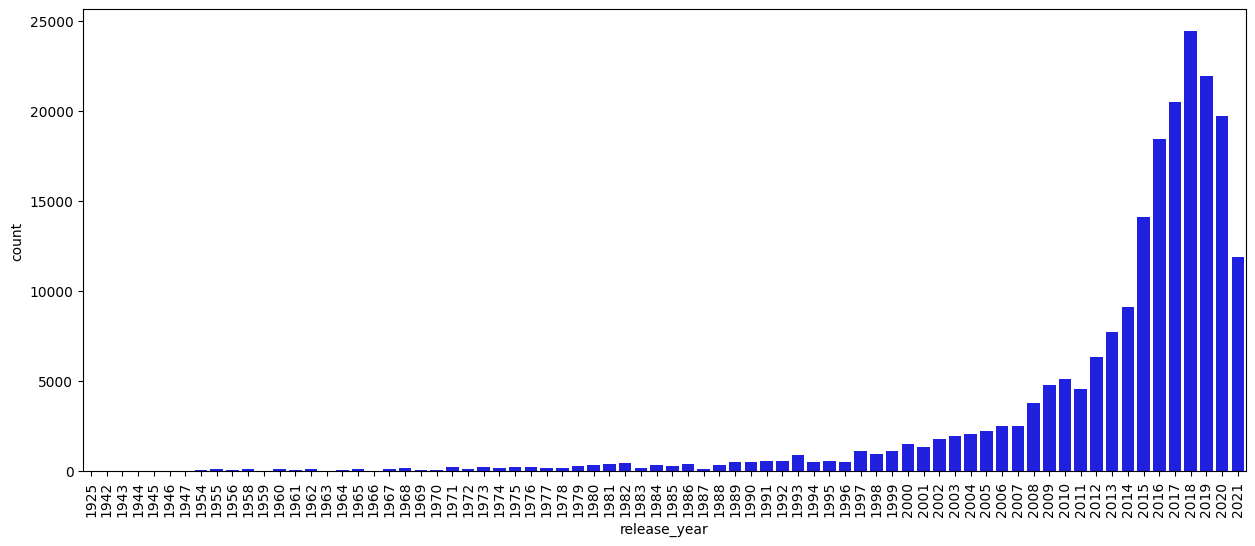

In [84]:
plt.figure(figsize = (15,6))
sns.countplot(data = df, x = 'release_year', color = 'b')
plt.xticks(rotation = 90)
plt.show()


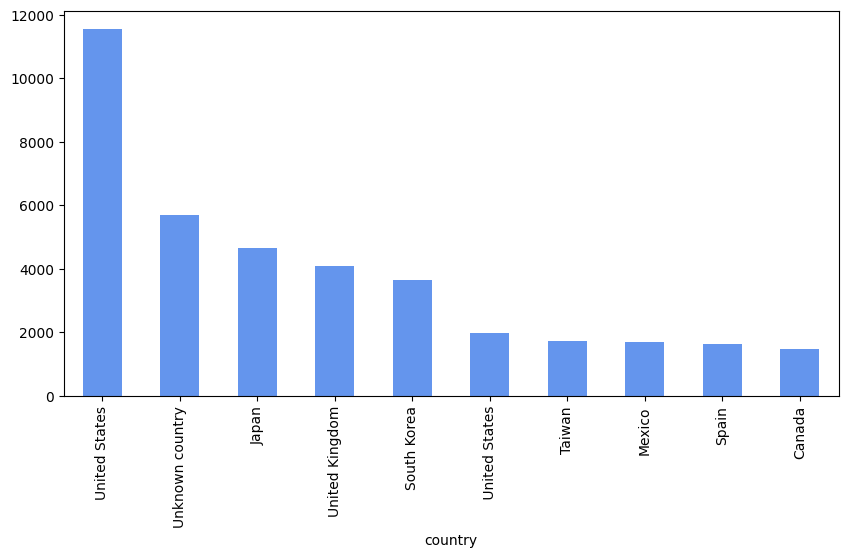

In [85]:
# graphical representation of top 10 countries for TV Show
TVshow_df = df[df['type'] == 'TV Show']
TVshow_df_count = TVshow_df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
TVshow_df_count.plot(kind='bar', color='cornflowerblue')
plt.show()

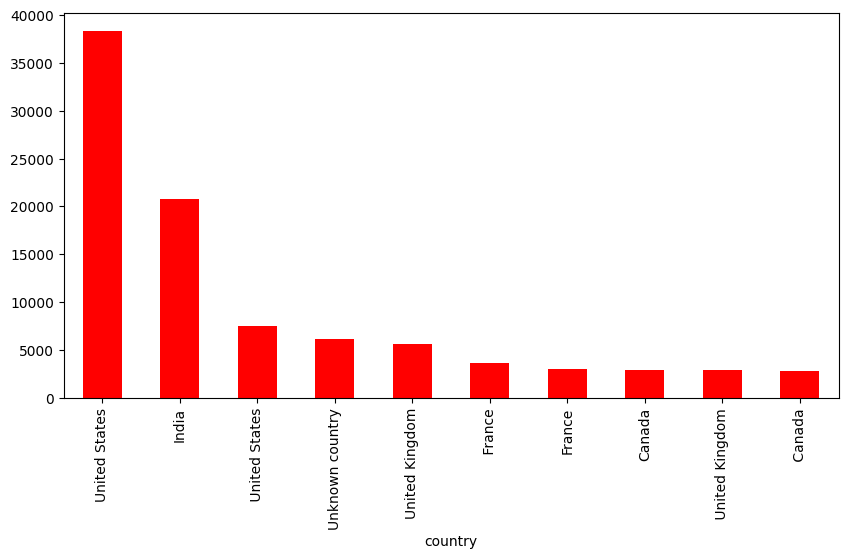

In [86]:
# graphical representation of top 10 countries for Movie
Movie_df = df[df['type'] == 'Movie']
Movie_df_count = Movie_df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
Movie_df_count.plot(kind='bar', color='r')
plt.show()

#**Q2 Comparison of tv shows vs. movies.**

Q2.1 Find the number of movies produced in each country and pick the top 10
countries.

In [87]:
movies_count = df[df['type'] == 'Movie']['country'].value_counts()
movies_count

,count
country,
United States,38316
India,20761
United States,7501
Unknown country,6199
United Kingdom,5655
...,...
Botswana,2
Palestine,2
Nicaragua,1


In [88]:
movies_df = df[df['type'] == 'Movie']
movies_count = movies_df['country'].value_counts().head(10)
movies_count

,count
country,
United States,38316
India,20761
United States,7501
Unknown country,6199
United Kingdom,5655
France,3592
France,3015
Canada,2928
United Kingdom,2925


In [89]:
movies_df = df[df['type'] == 'Movie']
top10_Movies_country = movies_df.groupby('country')['title'].count().sort_values(ascending=False).head(10)
top10_Movies_country

,title
country,
United States,38316
India,20761
United States,7501
Unknown country,6199
United Kingdom,5655
France,3592
France,3015
Canada,2928
United Kingdom,2925


Q2.2 Find the number of Tv-Shows produced in each country and pick the top 10 countries.

In [90]:
TVshow_df = df[df['type'] == 'TV Show']
TVshow_df_count = TVshow_df['country'].value_counts().head(10)
TVshow_df_count


,count
country,
United States,11552
Unknown country,5698
Japan,4673
United Kingdom,4078
South Korea,3648
United States,1981
Taiwan,1719
Mexico,1683
Spain,1647


In [91]:
TVshow_df = df[df['type'] == 'TV Show']
top10_TVshow_country = TVshow_df.groupby('country')['title'].count().sort_values(ascending = False).head(10)
top10_TVshow_country

,title
country,
United States,11552
Unknown country,5698
Japan,4673
United Kingdom,4078
South Korea,3648
United States,1981
Taiwan,1719
Mexico,1683
Spain,1647


# **Q3 What is the best time to launch a TV show?**

 Q3.1 Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

**Best Week**

For TV Show

In [92]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['week_number'] = df['date_added'].dt.isocalendar().week
tv_shows_df = df[df['type'] == 'TV Show']
tv_show_weekly_count = tv_shows_df['week_number'].value_counts().sort_index()
best_week_tv_show = tv_show_weekly_count.idxmax()
print(f"Best week to release TV shows: {best_week_tv_show}")

Best week to release TV shows: 27


For Movie

In [93]:
movies_df = df[df['type'] == 'Movie']
movie_weekly_count = movies_df['week_number'].value_counts().sort_index()
best_week_movie = movie_weekly_count.idxmax()
print(f"Best week to release movies: {best_week_movie}")

Best week to release movies: 1


# Q3.2 Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

**Best Month**

For TV Show

In [94]:
df['month_number'] = df['date_added'].dt.month
tv_shows_df = df[df['type'] == 'TV Show']
tv_show_monthly_count = tv_shows_df['month_number'].value_counts().sort_index()
best_month_tv_show = tv_show_monthly_count.idxmax()
print(f"Best month to release TV shows: {best_month_tv_show}")

Best month to release TV shows: 12.0


For Movie

In [95]:
movie_df = df[df['type'] == 'TV Show']
movie_monthly_count = movie_df['month_number'].value_counts().sort_index()
best_month_tv_movie = movie_monthly_count.idxmax()
print(f"Best month to release TV shows: {best_month_tv_movie}")

Best month to release TV shows: 12.0


# **Q4 Analysis of actors/directors of different types of shows/movies.**

Q4.1 Identify the top 10 cast who have appeared in most movies or TV shows.

In [96]:
#grouping the data
grouped_cast_data = df.groupby(['cast', 'type'])['title'].nunique().reset_index()

#Sorting data
TVshows_data = grouped_cast_data[grouped_cast_data['type'] == 'TV Show'] #TV Shows
Movies_data = grouped_cast_data[grouped_cast_data['type'] == 'Movie'] #Movies

#Top 10
Top10_cast_TVshows = TVshows_data.sort_values(by = 'title', ascending = False).head(11)[1:11]
Top10_cast_movies = Movies_data.sort_values(by = 'title', ascending = False).head(11)[1:11]

print(f"10 cast who have appeared in most TV shows: \n{Top10_cast_TVshows}")
print(f"10 cast who have appeared in most movies: \n{Top10_cast_movies}")

10 cast who have appeared in most TV shows: 
                     cast     type  title
33652    Takahiro Sakurai  TV Show     24
37026           Yuki Kaji  TV Show     17
17418      Junichi Suwabe  TV Show     17
698             Ai Kayano  TV Show     17
7487          Daisuke Ono  TV Show     14
38866  David Attenborough  TV Show     14
33682     Takehito Koyasu  TV Show     13
36879    Yoshimasa Hosoya  TV Show     13
37002     Yuichi Nakamura  TV Show     13
17697       Kana Hanazawa  TV Show     12
10 cast who have appeared in most movies: 
                  cast   type  title
2898       Anupam Kher  Movie     38
26280          Om Puri  Movie     27
29942     Rupa Bhimani  Movie     27
42469   Shah Rukh Khan  Movie     26
26641     Paresh Rawal  Movie     25
4646       Boman Irani  Movie     25
17288    Julie Tejwani  Movie     24
37756     Akshay Kumar  Movie     23
28255      Rajesh Kava  Movie     21
17817   Kareena Kapoor  Movie     20


4.2 Identify the top 10 directors who have appeared in most movies or TV shows.

In [97]:
 #grouping the data
grouped_director_data = df.groupby(['director', 'type'])['title'].nunique().reset_index()

#Sorting data
TVshows_data = grouped_director_data[grouped_director_data['type'] == 'TV Show'] #TV Shows
Movies_data = grouped_director_data[grouped_director_data['type'] == 'Movie'] #Movies

#Top 10
Top10_director_TVshows = TVshows_data.sort_values(by = 'title', ascending = False).head(11)[1:11]
Top10_director_movies = Movies_data.sort_values(by = 'title', ascending = False).head(11)[1:11]

print(f"10 cast who have appeared in most TV shows: \n{Top10_director_TVshows}")
print(f"10 cast who have appeared in most movies: \n{Top10_director_movies}")

10 cast who have appeared in most TV shows: 
                    director     type  title
2908               Ken Burns  TV Show      3
850      Alastair Fothergill  TV Show      3
4203         Rob Seidenglanz  TV Show      2
4542             Shin Won-ho  TV Show      2
2809              Jung-ah Im  TV Show      2
4621             Stan Lathan  TV Show      2
212    Gautham Vasudev Menon  TV Show      2
2594           Joe Berlinger  TV Show      2
2298             Hsu Fu-chun  TV Show      2
2325          Iginio Straffi  TV Show      2
10 cast who have appeared in most movies: 
                 director   type  title
4072        Rajiv Chilaka  Movie     22
4119          Raúl Campos  Movie     18
265             Jan Suter  Movie     18
4709          Suhas Kadav  Movie     16
2476            Jay Karas  Movie     15
3275         Marcus Raboy  Movie     15
1399  Cathy Garcia-Molina  Movie     13
2473          Jay Chapman  Movie     12
3348      Martin Scorsese  Movie     12
5141      Youssef

# **Q5 Which genre movies are more popular or produced more**

In [98]:
df_movies = df[df['type'] == 'Movie']
df_movies.groupby('listed_in').agg({'title' : 'nunique'}).reset_index().sort_values(by = 'title', ascending = False).head(10)

,listed_in,title
10,International Movies,2624
25,Dramas,1600
22,Comedies,1210
18,Action & Adventure,859
24,Documentaries,829
6,Dramas,827
9,Independent Movies,736
13,Romantic Movies,613
20,Children & Family Movies,605
17,Thrillers,512


In [99]:
# Genre count
genre_df = df['listed_in'].reset_index(drop=True)
genre_counts = genre_df.value_counts().head(10)
print(genre_counts)

listed_in
 International Movies       27141
Dramas                      19657
Comedies                    13894
Action & Adventure          12216
 Dramas                     10149
 Independent Movies          9564
Children & Family Movies     9294
 TV Dramas                   7956
International TV Shows       7065
 Comedies                    6935
Name: count, dtype: int64


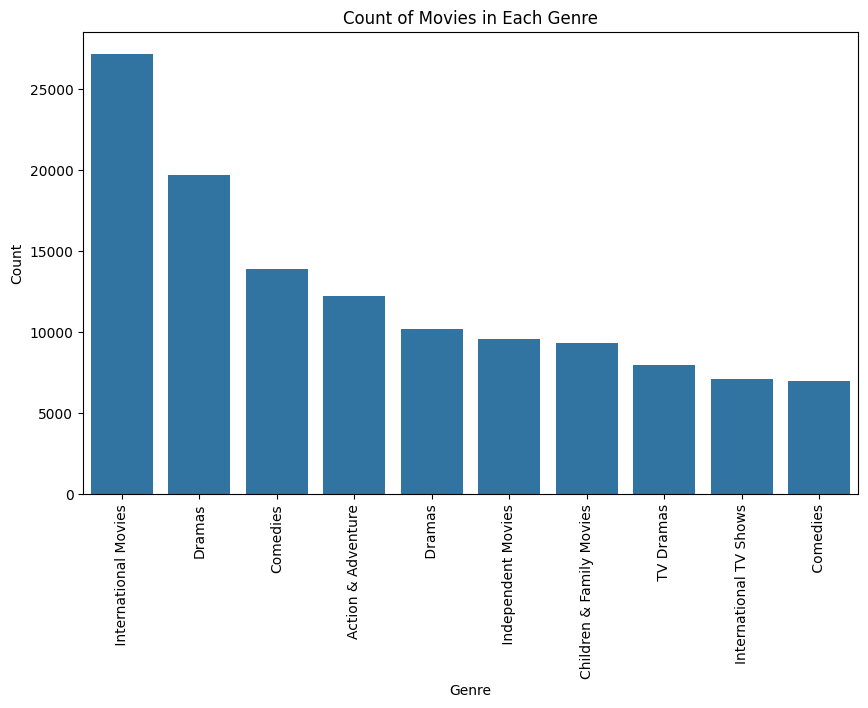

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Movies in Each Genre')
plt.show()

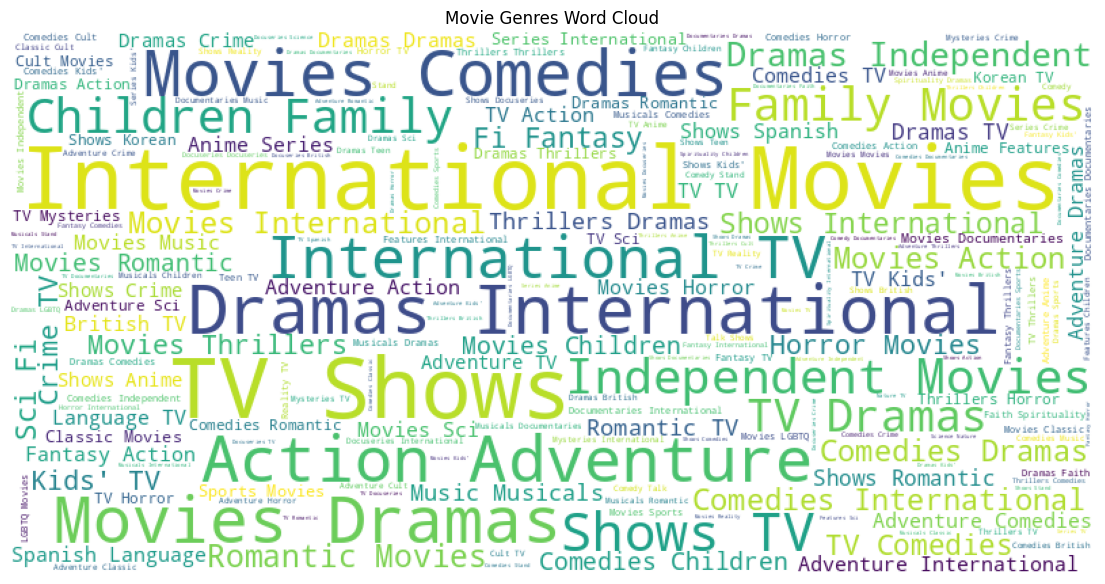

In [101]:
from wordcloud import WordCloud

# Concatenate all genres from the "listed_in" column
all_genres = ' '.join(df['listed_in'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

# Display the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Movie Genres Word Cloud')
plt.show()

# **Q6 Days taken by movie to add on Netflix after release**

In [102]:
# Convert the "date_added" column to a datetime format
df['Release_date'] = pd.to_datetime(df['date_added'])
df['Release_Year'] = pd.to_datetime(df['release_year'], format='%Y')

# Calculate the difference between "date_added" and "release_year" in days
df['days_to_add'] = (df['Release_date'] - (df['Release_Year'])).dt.days

# Find the mode of the "days_to_add" column
mode_days = df['days_to_add'].mode()
mode_days

,days_to_add
0,547.0


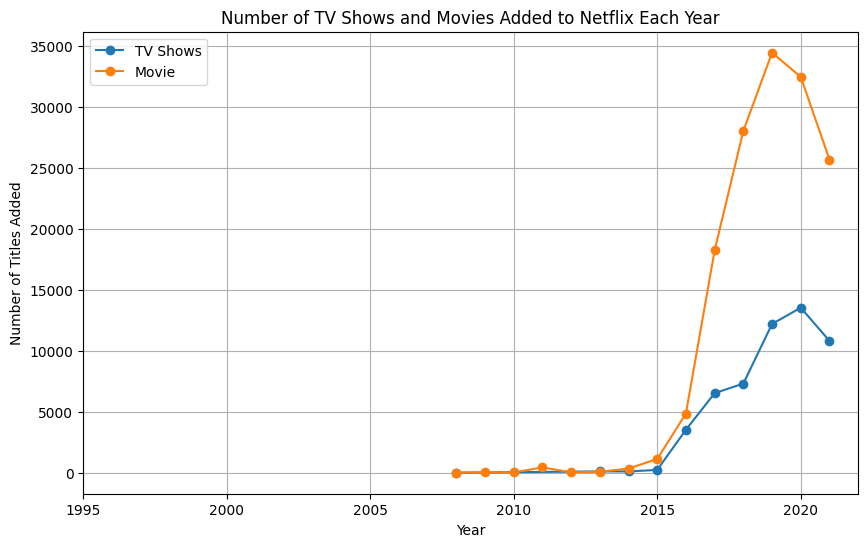

In [103]:
# Convert the "date_added" column to a datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

df['year_added'] = df['date_added'].dt.year         # Create a new column "year_added"

# Count the number of TV shows and movies added in each year
tv_shows_per_year = df[df['type'] == 'TV Show']['year_added'].value_counts().sort_index()
movies_per_year = df[df['type'] == 'Movie']['year_added'].value_counts().sort_index()

# Plot the number of TV shows and movies added per year
plt.figure(figsize=(10, 6))
plt.plot(tv_shows_per_year.index, tv_shows_per_year.values, label='TV Shows', marker='o')
plt.plot(movies_per_year.index, movies_per_year.values, label='Movies', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.title('Number of TV Shows and Movies Added to Netflix Each Year')
plt.xlim(left=1995, right=2022)
plt.grid(True)
plt.xticks(rotation=0)
plt.legend(['TV Shows', 'Movie'], loc = 'upper left')
plt.show()

In [104]:
df['Release_date'] = pd.to_datetime(df['date_added'])
df['Release_date']

,Release_date
0,2021-09-25
1,2021-09-24
1,2021-09-24
1,2021-09-24
1,2021-09-24
...,...
8806,2019-03-02
8806,2019-03-02
8806,2019-03-02
8806,2019-03-02
